Read and plot STARE indices from a 'sidecar' file. Show the difference between level 27 with the maximum resolution and indices where the resolution has been set using the geographic point spacing.

In [1]:
import h5py
import pystare as ps
import numpy

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.tri as tri

import cartopy
import cartopy.crs as ccrs

Some helper functions for plotting & printing.

In [2]:
def add_coastlines(figax, set_global=False):
    ax = figax[1]
    if set_global:
        ax.set_global()
    # ax.set_global()
    ax.coastlines()
    return figax

def hello_plot(
        spatial_index_values=None
        ,figax=None
        ,plot_options={'projection':ccrs.PlateCarree(),'transform':ccrs.Geodetic()}
        ,show=True
        ):

    if figax is None:
        fig,ax = plt.subplots(1,subplot_kw=plot_options)
        ax.set_global()
        ax.coastlines()
        figax = [fig,ax]
    else:
        ax = figax[1]
    
    if spatial_index_values is not None:
        lons,lats,intmat = ps.triangulate_indices(spatial_index_values)
        siv_triang = tri.Triangulation(lons,lats,intmat)
        ax.triplot(siv_triang,transform=plot_options['transform'])
    
    if show:
        plt.show()
        
    return figax

def hex16(i):
    return "0x%016x"%i

km  = 1 # Unit of length
deg = 1 # Unit of angle

Read the indices from a small sample file - there are only 121 indices in this sample.

In [3]:
f = h5py.File('MYD09.A2019003_hacked_stare.h5', 'r')

In [4]:
f.keys()


<KeysViewHDF5 ['Latitude', 'Longitude', 'Stare_Index', 'X', 'Y']>

In [5]:
s_index = f['Stare_Index']

In [6]:
s_index

<HDF5 dataset "Stare_Index": shape (121,), type "<i8">

In [7]:
s_index.shape

(121,)

In [8]:
s_index.dtype

dtype('int64')

In [9]:
s_index[0:10]

array([3440016635821480923, 3440016636597740219, 3440016629613163483,
       3440016719479414747, 3440016722200494331, 3440016719817182875,
       3440016700119921947, 3440016705668400411, 3440016700675380891,
       3440016228216299035])

In [10]:
# Set up the projection and transformation
proj         = ccrs.PlateCarree()
# proj        = ccrs.Robinson() # Drives matplotlib bug.
# proj        = ccrs.Mollweide() # Drives matplotlib bug.
transf       = ccrs.Geodetic()
plot_options = {'projection':proj,'transform':transf}

In [11]:
# ps.triangulate_indices(s_index)

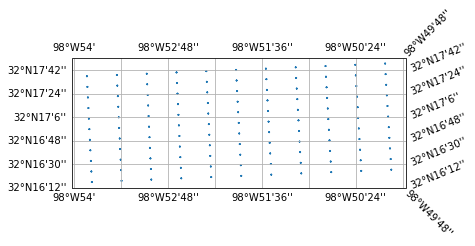

In [12]:
figax = add_coastlines(plt.subplots(1,subplot_kw=plot_options))

# figax[1].set_extent([-100, -6, 31, 34], ccrs.PlateCarree())
figax[1].gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

figax = hello_plot(s_index,figax,show=True)

# siv = 0 # STARE Spatial Index Value, geolocation bits are 0, resolution level is 0.
# print("Spatial ID",hex16(siv),siv)

# figax = hello_plot([siv],figax)

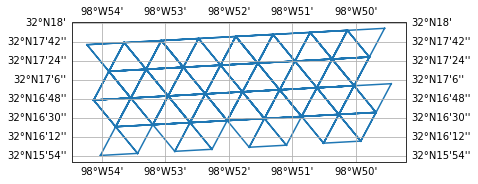

In [15]:
figax_res = add_coastlines(plt.subplots(1,subplot_kw=plot_options))

# figax[1].set_extent([-100, -6, 31, 34], ccrs.PlateCarree())
figax_res[1].gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

f_res = h5py.File('MYD09.A2019003_hacked_stare_res.h5', 'r')
s_index_res = f_res['Stare_Index']

figax_res = hello_plot(s_index_res,figax_res,show=True)



We can see that the stare indices with the resolution set are different values

In [19]:
print(s_index[:])

[3440016635821480923 3440016636597740219 3440016629613163483
 3440016719479414747 3440016722200494331 3440016719817182875
 3440016700119921947 3440016705668400411 3440016700675380891
 3440016228216299035 3440016232210672475 3440016633823675291
 3440016630468775675 3440016614388901691 3440016732747651771
 3440016737316657947 3440016736966712923 3440016694202203483
 3440016692212685595 3440016691888029339 3440016256098292123
 3440016257882577819 3440016618540755771 3440016618954593947
 3440016614751113115 3440016734430819515 3440016739905655931
 3440016737145070491 3440016695769201659 3440016696483270267
 3440016693527482011 3440016257621636475 3440016258294365595
 3440016617392130779 3440016620501988379 3440016728986652059
 3440016733316379835 3440016741040054651 3440016709705577499
 3440016694670283099 3440016698103688187 3440016692940444027
 3440016239845166779 3440016259950441723 3440016555313781147
 3440016620013565787 3440016729204831131 3440016729359608699
 3440016739182414875 344

In [18]:
print(s_index_res[:])

[3440016635821480910 3440016636597740206 3440016629613163470
 3440016719479414734 3440016722200494318 3440016719817182862
 3440016700119921934 3440016705668400398 3440016700675380878
 3440016228216299022 3440016232210672462 3440016633823675278
 3440016630468775662 3440016614388901678 3440016732747651758
 3440016737316657934 3440016736966712910 3440016694202203470
 3440016692212685582 3440016691888029326 3440016256098292110
 3440016257882577806 3440016618540755758 3440016618954593934
 3440016614751113102 3440016734430819502 3440016739905655918
 3440016737145070478 3440016695769201646 3440016696483270254
 3440016693527481998 3440016257621636462 3440016258294365582
 3440016617392130766 3440016620501988366 3440016728986652046
 3440016733316379822 3440016741040054638 3440016709705577486
 3440016694670283086 3440016698103688174 3440016692940444014
 3440016239845166766 3440016259950441710 3440016555313781134
 3440016620013565774 3440016729204831118 3440016729359608686
 3440016739182414862 344